In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import os
import math
import altair as alt
from altair import datum

#FILTRA INTERACTIONLOCS EN HETERO AND HOMO Y CREA FILES QUE LOS GUARDA EN ANALYSIS
allInteractions = pd.read_csv("../data/AllInteractions - 2020-11-09T161203.525.txt",  sep='\t')
allLocs = pd.read_csv("../data/AllLocs - 2020-11-05T145613.985.txt",  sep='\t')
trackHeaderName = 'Track'
InteractionDistanceHeaderName = "InteractionDistance"
InteractionDurationHeaderName = "InteractionDuration"
trackHeaderName ='Track'

graphUnitSize = 1000 #@param {type:"slider", min:50, max:1000, step:25}

minPlane = 0 #@param {type:"slider", min:0, max:4000, step:100}
maxPlane = 4000 #@param {type:"slider", min:0, max:4000, step:100}

pointSize = 5 #@param {type:"slider", min:0, max:10, step:1}

confinementLevels = {1:'Dimer', 2:'Co-Confined', 3:'Free'}

interactionLocs = allLocs[allLocs['PartnerTrackInPlane']>0]

totalTrackNum = pd.unique(allLocs['Track'])
trackNums = pd.unique(interactionLocs['Track'])
print(str(len(trackNums)) + " Tracks with interactions of " + str(len(totalTrackNum)) +" total tracks")


heteroallLocs = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<100) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>20)]  #Cambio para que seleccione por PartnerTrackDeltaAverageWavelength
heteroallLocs.to_csv("../Anaysis" +'/Heterodimers.txt',sep='\t')
print('Heterodimers saved to ' + "../Anaysis")

totalTrackNum = pd.unique(allLocs['Track'])
trackheteroNums = pd.unique(heteroallLocs['Track'])
print(str(len(trackheteroNums)) + " Tracks with interactions of " + str(len(totalTrackNum)) +" total tracks")

homoallLocs = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<5) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>0) & (interactionLocs['AverageWavelength']>300)]  #Cambio para que seleccione por PartnerTrackDeltaAverageWavelength
homoallLocs.to_csv("../Anaysis" +'/Homodimers.txt',sep='\t')
print('Homodimers saved to ' + "../Anaysis")

totalTrackNum = pd.unique(allLocs['Track'])
trackhomoNums = pd.unique(homoallLocs['Track'])
print(str(len(trackhomoNums)) + " Tracks with interactions of " + str(len(totalTrackNum)) +" total tracks")

print('Finished ')





121 Tracks with interactions of 126 total tracks
Heterodimers saved to ../Anaysis
26 Tracks with interactions of 126 total tracks
Homodimers saved to ../Anaysis
47 Tracks with interactions of 126 total tracks
Finished 


In [1]:
help (sns.relplot)

NameError: name 'sns' is not defined

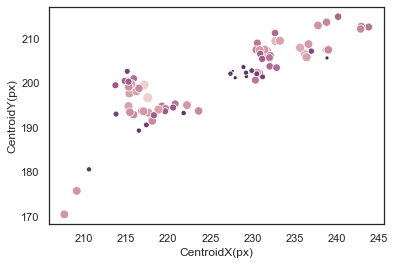

In [404]:
#Plots heterodimers
heteroallLocsfilter = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<100) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>20)]  #Cambio para que seleccione por PartnerTrackDeltaAverageWavelength
heteroallLocs = heteroallLocsfilter[(heteroallLocsfilter['Wavelength']>300) & (heteroallLocsfilter['PartnerTrackWavelength']>300)]

sns.scatterplot(data=heteroallLocs, x="CentroidX(px)", y="CentroidY(px)", hue="InteractionDistance", size="InteractionDistance", sizes=(100,10), legend="")


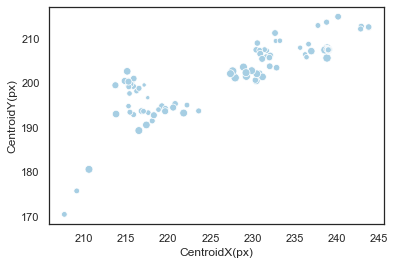

In [398]:
#Plots heterodimers
heteroallLocsfilter = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<100) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>20)]  #Cambio para que seleccione por PartnerTrackDeltaAverageWavelength
heteroallLocs = heteroallLocsfilter[(heteroallLocsfilter['Wavelength']>600) & (heteroallLocsfilter['PartnerTrackWavelength']>600)]

sns.scatterplot(data=heteroallLocs, x="CentroidX(px)", y="CentroidY(px)", size="InteractionDistance", legend='')
sns.set_palette(sns.color_palette("Paired"))


NameError: name 'df' is not defined

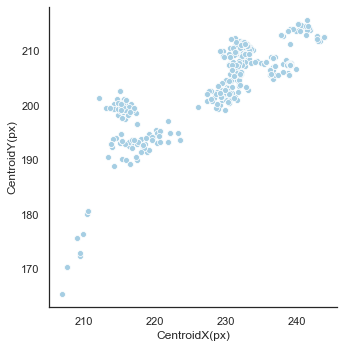

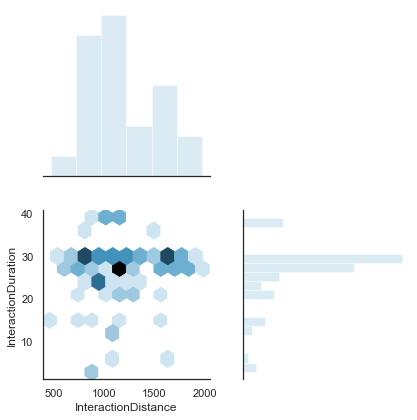

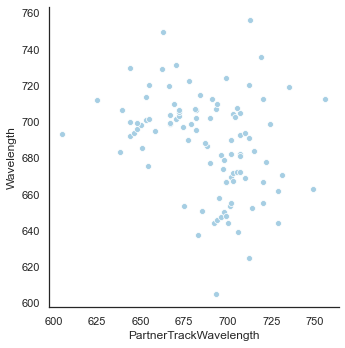

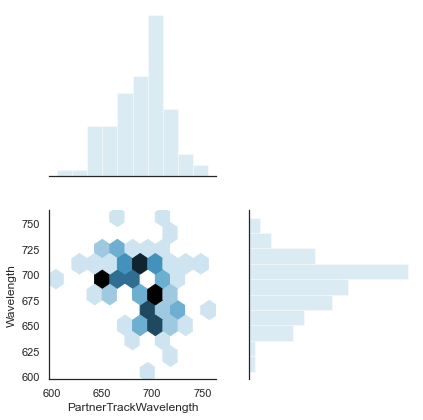

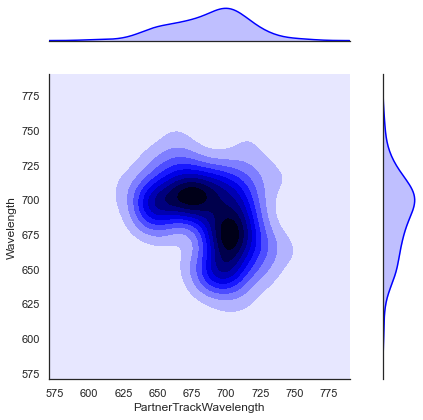

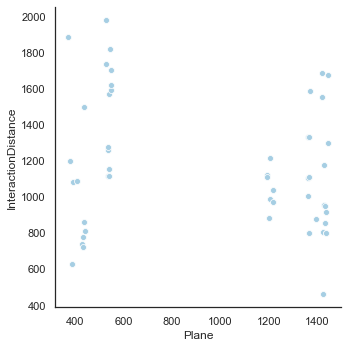

In [412]:
#XY heterodimers

heteroallLocs = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<100) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>20)]  #Cambio para que seleccione por PartnerTrackDeltaAverageWavelength
sns.relplot(x="CentroidX(px)", y="CentroidY(px)", data= heteroallLocs)

#Plots heterodimers
heteroallLocsfilter = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<100) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>20)]  #Cambio para que seleccione por PartnerTrackDeltaAverageWavelength
heteroallLocs = heteroallLocsfilter[(heteroallLocsfilter['Wavelength']>600) & (heteroallLocsfilter['PartnerTrackWavelength']>600)]

sns.scatterplot(data=heteroallLocs, x="CentroidX(px)", y="CentroidY(px)", legend="")
sns.jointplot(x=heteroallLocs["InteractionDistance"], y=heteroallLocs["InteractionDuration"], kind='hex', ratio=1)
sns.relplot(x=("PartnerTrackWavelength"), y=("Wavelength"), data= heteroallLocs)
sns.jointplot(x=heteroallLocs["PartnerTrackWavelength"], y=heteroallLocs["Wavelength"], kind='hex', ratio=1)
sns.jointplot(x=heteroallLocs["PartnerTrackWavelength"], y=heteroallLocs["Wavelength"], kind='kde',color="blue", space=1)
sns.relplot(x="Plane", y="InteractionDistance", data=heteroallLocs)

#Basic 2D density plot
sns.set_style("white")
sns.kdeplot(df.PartnerTrackWavelengt, df.Wavelength)
#sns.plt.show()
 
# Custom it with the same argument as 1D density plot
sns.kdeplot(df.PartnerTrackWavelengt, df.Wavelength, cmap="Reds", shade=True, bw=.15)
 
# Some features are characteristic of 2D: color palette and wether or not color the lowest range
sns.kdeplot(df.PartnerTrackWavelengt, df.Wavelength, cmap="Blues", shade=True, shade_lowest=True, )
sns.plt.show()





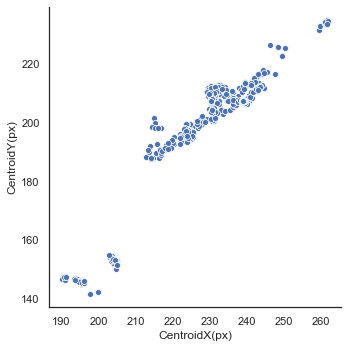

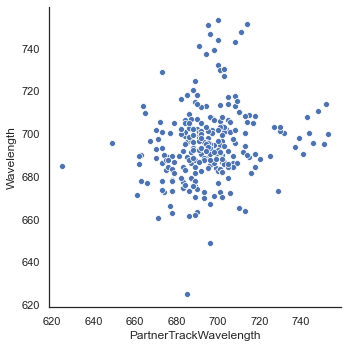

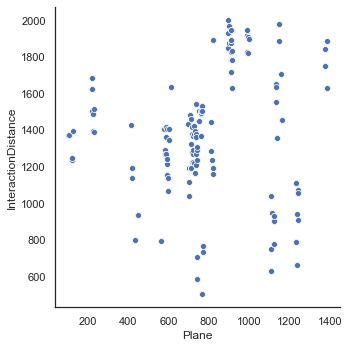

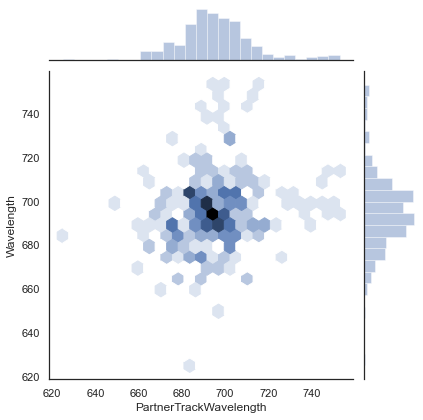

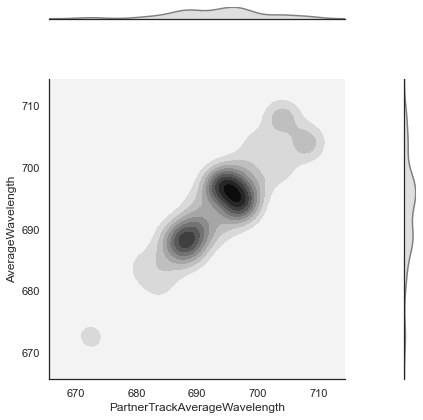

In [311]:
#XY homodimers
homoallLocs = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<5) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>0)]  #Cambio para que seleccione por PartnerTrackDeltaAverageWavelength
sns.relplot(x="CentroidX(px)", y="CentroidY(px)", data= homoallLocs)

#Plots homodimers
homoallLocsfilter = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<5) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>0)]  #Cambio para que seleccione por PartnerTrackDeltaAverageWavelength
homoallLocs = homoallLocsfilter[(homoallLocsfilter['Wavelength']>600) & (homoallLocsfilter['PartnerTrackWavelength']>600)]

sns.relplot(x=("PartnerTrackWavelength"), y=("Wavelength"), data= homoallLocs)
sns.relplot(x="Plane", y="InteractionDistance", data=homoallLocs)
sns.jointplot(x=homoallLocs["PartnerTrackWavelength"], y=homoallLocs["Wavelength"], kind='hex', ratio=5)
sns.jointplot(x=homoallLocs["PartnerTrackAverageWavelength"], y=homoallLocs["AverageWavelength"], kind='kde',color="grey", space=5)


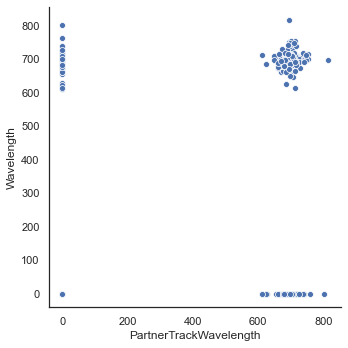

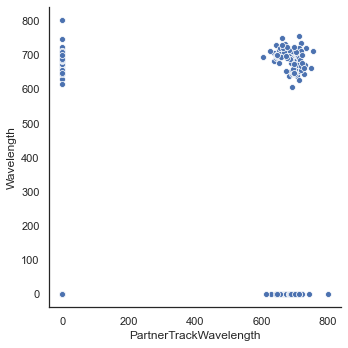

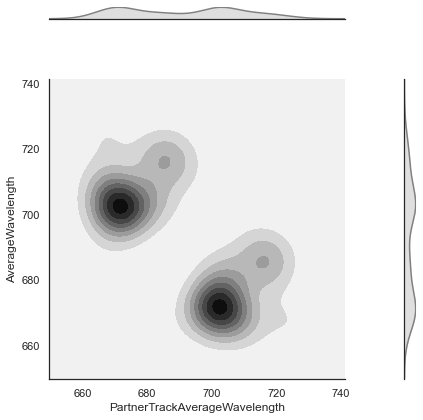

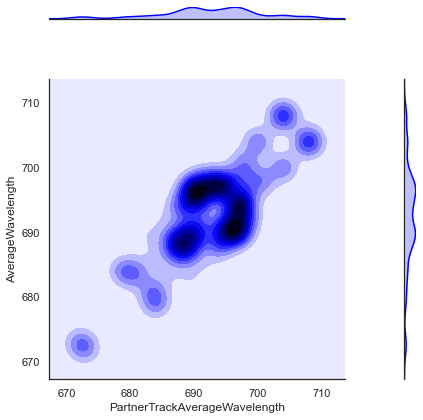

In [296]:
import seaborn as sns

homoallLocs = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<8) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>0)]   
heteroallLocs = interactionLocs[(interactionLocs['PartnerTrackDeltaAverageWavelength']<100) & (interactionLocs['PartnerTrackDeltaAverageWavelength']>20)]   

sns.relplot(x=("PartnerTrackWavelength"), y=("Wavelength"), data= homoallLocs)
sns.relplot(x=("PartnerTrackWavelength"), y=("Wavelength"), data= heteroallLocs)

sns.jointplot(x=heteroallLocs["PartnerTrackAverageWavelength"], y=heteroallLocs["AverageWavelength"], kind='kde',color="grey", space=5)
sns.jointplot(x=homoallLocs["PartnerTrackAverageWavelength"], y=homoallLocs["AverageWavelength"], kind='kde',color="blue", space=5)


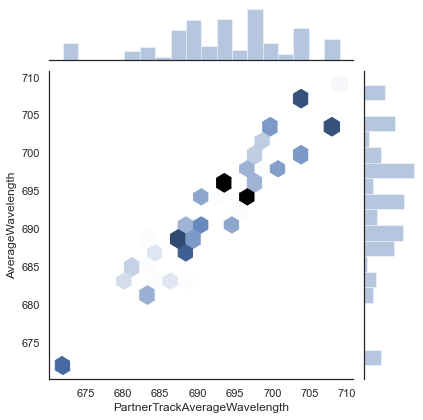

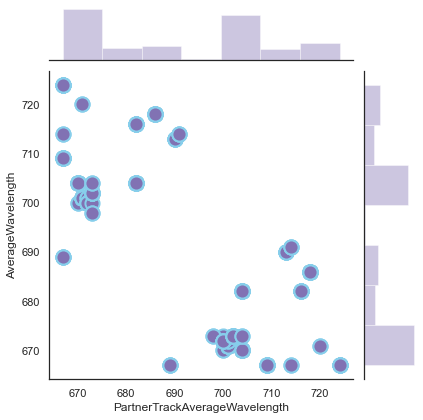

In [168]:
import seaborn as sns
sns.jointplot(x=homoallLocs["PartnerTrackAverageWavelength"], y=homoallLocs["AverageWavelength"], kind='hex', ratio=5)
sns.jointplot(x=heteroallLocs["PartnerTrackAverageWavelength"], y=heteroallLocs["AverageWavelength"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
 



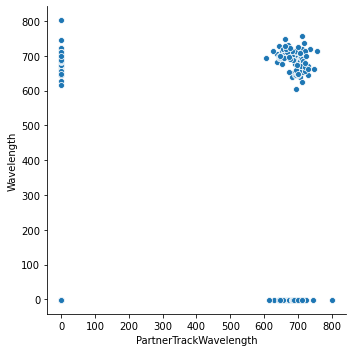

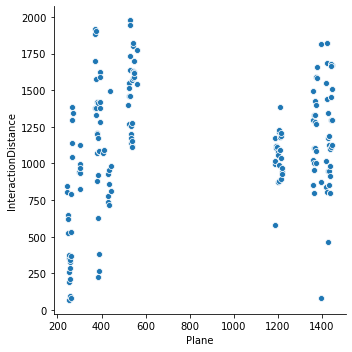

In [104]:
sns.relplot(x="PartnerTrackWavelength", y="Wavelength", data= heteroallLocs)
sns.relplot(x="Plane", y="InteractionDistance", data=heteroallLocs)

In [46]:
#HOMO

homoallLocs = pd.read_csv("../Anaysis/Homodimers.txt",  sep='\t')

confinementLevelChart = alt.Chart(homoallLocs, title="ConfinementLevel").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('ConfinementLevel:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/6
).transform_filter(
    planeInterval
)

wavelengthChart = alt.Chart(homoallLocs[(homoallLocs['AverageWavelength']>300 )], title="AverageWavelength").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('AverageWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

instWavelengthChart = alt.Chart(homoallLocs[(homoallLocs['Wavelength']>300 ) & (homoallLocs['PartnerTrackInPlane']>0)], title="Average Wavelength + Instant Wavelength for Confined Points").mark_point(size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('Wavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
)

deltaAvgWavelengthChart = alt.Chart(homoallLocs[(homoallLocs['PartnerTrackDeltaWavelength']<100) & (homoallLocs['PartnerTrackDeltaWavelength']>20)], title="DeltaWavelength").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('PartnerTrackDeltaAverageWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

deltaWavelengthChart = alt.Chart(homoallLocs[(homoallLocs['PartnerTrackDeltaWavelength']<100) & (homoallLocs['PartnerTrackDeltaWavelength']>20)], title="DeltaWavelength").mark_point(filled=False, size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('PartnerTrackDeltaWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
)

wavelengthVsDeltaChart = alt.Chart(homoallLocs[(homoallLocs['PartnerTrackDeltaWavelength']<100) & (homoallLocs['PartnerTrackDeltaWavelength']>20)], title="wavelengthVsDeltaChart").mark_point(size=pointSize).encode(
    alt.X('Wavelength:Q',scale=alt.Scale(zero=False)),
    alt.Y('PartnerTrackDeltaWavelength:Q', scale=alt.Scale(zero=False)),
    #color = alt.Color('Track:N',legend=None),
    color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
    tooltip = ['Track','Wavelength']
).properties(
    width=graphUnitSize/4,
    height=graphUnitSize/4
).interactive()

wavelengthVsPartnerWavelengthChart = alt.Chart(homoallLocs[(homoallLocs['PartnerTrackDeltaWavelength']<100) & (homoallLocs['PartnerTrackDeltaWavelength']>20)], title="wavelengthVsPartnerWavelengthChart").mark_point(size=pointSize).encode(
    alt.X('Wavelength:Q',scale=alt.Scale(zero=False)),
    alt.Y('PartnerTrackWavelength:Q', scale=alt.Scale(zero=False)),
    #color = alt.Color('Track:N',legend=None),
    color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
    tooltip = ['Track','Wavelength']
).properties(
    width=graphUnitSize/4,
    height=graphUnitSize/4
).interactive()


xyChart = alt.Chart(homoallLocs, title="XY").mark_line().encode(
  alt.X('CentroidX(px):Q',scale=alt.Scale(zero=False)),
  alt.Y('CentroidY(px):Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize,
  height=graphUnitSize
).transform_filter(
    planeInterval
).interactive()

xyConfinedChart = alt.Chart(homoallLocs[homoallLocs['PartnerTrackInPlane']>0], title="Confined XY Plot").mark_point(size=pointSize).encode(
  alt.X('CentroidX(px):Q',scale=alt.Scale(zero=False)),
  alt.Y('CentroidY(px):Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize/4,
  height=graphUnitSize/4
).interactive()

# binaryChart & (((homoallLocsChart+confinedLocsChart) & confinementLevelChart  & (wavelengthChart+instWavelengthChart) ) | (xyChart + xyConfinedChart))
(confinedLocsChart & (wavelengthChart+instWavelengthChart) & (deltaAvgWavelengthChart + deltaWavelengthChart)) | (xyConfinedChart & wavelengthVsDeltaChart & wavelengthVsPartnerWavelengthChart)
#(confinedLocsChart & (wavelengthChart+instWavelengthChart) & (deltaWavelengthChart))


alt.HConcatChart(...)

In [48]:
#binaryChart & confinedLocsChart
#(binaryChart & (allLocsChart + confinedLocsChart) ) | xyChart

#HETERO
heteroallLocs = pd.read_csv("../Anaysis/Heterodimers.txt",  sep='\t')

confinementLevelChart = alt.Chart(heteroallLocs, title="ConfinementLevel").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('ConfinementLevel:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/6
).transform_filter(
    planeInterval
)

wavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['AverageWavelength']>300 )], title="AverageWavelength").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('AverageWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

instWavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['Wavelength']>300 ) & (heteroallLocs['PartnerTrackInPlane']>0)], title="Average Wavelength + Instant Wavelength for Confined Points").mark_point(size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('Wavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
)

deltaAvgWavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['PartnerTrackDeltaWavelength']<100) & (heteroallLocs['PartnerTrackDeltaWavelength']>20)], title="DeltaWavelength").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('PartnerTrackDeltaAverageWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

deltaWavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['PartnerTrackDeltaWavelength']<100) & (heteroallLocs['PartnerTrackDeltaWavelength']>20)], title="DeltaWavelength").mark_point(filled=False, size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('PartnerTrackDeltaWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
)

wavelengthVsDeltaChart = alt.Chart(heteroallLocs[(heteroallLocs['PartnerTrackDeltaWavelength']<100) & (heteroallLocs['PartnerTrackDeltaWavelength']>20)], title="wavelengthVsDeltaChart").mark_point(size=pointSize).encode(
    alt.X('Wavelength:Q',scale=alt.Scale(zero=False)),
    alt.Y('PartnerTrackDeltaWavelength:Q', scale=alt.Scale(zero=False)),
    #color = alt.Color('Track:N',legend=None),
    color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
    tooltip = ['Track','Wavelength']
).properties(
    width=graphUnitSize/4,
    height=graphUnitSize/4
).interactive()

wavelengthVsPartnerWavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['PartnerTrackDeltaWavelength']<100) & (heteroallLocs['PartnerTrackDeltaWavelength']>20)], title="wavelengthVsPartnerWavelengthChart").mark_point(size=pointSize).encode(
    alt.X('Wavelength:Q',scale=alt.Scale(zero=False)),
    alt.Y('PartnerTrackWavelength:Q', scale=alt.Scale(zero=False)),
    #color = alt.Color('Track:N',legend=None),
    color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
    tooltip = ['Track','Wavelength']
).properties(
    width=graphUnitSize/4,
    height=graphUnitSize/4
).interactive()


xyChart = alt.Chart(heteroallLocs, title="XY").mark_line().encode(
  alt.X('CentroidX(px):Q',scale=alt.Scale(zero=False)),
  alt.Y('CentroidY(px):Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize,
  height=graphUnitSize
).transform_filter(
    planeInterval
).interactive()

xyConfinedChart = alt.Chart(heteroallLocs[heteroallLocs['PartnerTrackInPlane']>0], title="Confined XY Plot").mark_point(size=pointSize).encode(
  alt.X('CentroidX(px):Q',scale=alt.Scale(zero=False)),
  alt.Y('CentroidY(px):Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize/4,
  height=graphUnitSize/4
).interactive()

# binaryChart & (((heteroallLocsChart+confinedLocsChart) & confinementLevelChart  & (wavelengthChart+instWavelengthChart) ) | (xyChart + xyConfinedChart))
(confinedLocsChart & (wavelengthChart+instWavelengthChart) & (deltaAvgWavelengthChart + deltaWavelengthChart)) | (xyConfinedChart & wavelengthVsDeltaChart & wavelengthVsPartnerWavelengthChart)
#(confinedLocsChart & (wavelengthChart+instWavelengthChart) & (deltaWavelengthChart))

alt.HConcatChart(...)

In [22]:
#@title Hit play to load plots { run: "auto" }

planeInterval = alt.selection_interval(encodings=['x'])

binaryChart = alt.Chart(homoallLocs.reset_index(), title="Select a plane range here and the other plots will follow").mark_line().encode(
alt.X('Plane:Q',scale=alt.Scale(zero=True)),
  alt.Y('InteractionDistance:Q', scale=alt.Scale(zero=True)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#alt.Scale(domain=alt.))
  tooltip = ['Track', 'PartnerTrackInPlane']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/6
).add_selection(
    planeInterval
)

allLocsChart = alt.Chart(homoallLocs.reset_index, title="All Localizations").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('InteractionDistance:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.)
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

xyChart = alt.Chart(homoallLocs.reset_index, title="XY").mark_line().encode(
  alt.X('x:Q',scale=alt.Scale(zero=False)),
  alt.Y('y:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength'],
).properties(
  width=graphUnitSize,
  height=graphUnitSize
).transform_filter(
    planeInterval
).interactive()

confinedLocsChart = alt.Chart(homoallLocs[homoallLocs['PartnerTrackInPlane']>0], title="All Locs").mark_point(size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('InteractionDistance:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'PartnerTrackInPlane:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  #tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).add_selection(
    planeInterval
)
#binaryChart & confinedLocsChart
#(binaryChart & (allLocsChart + confinedLocsChart) ) | xyChart


confinementLevelChart = alt.Chart(homoallLocs, title="ConfinementLevel").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('ConfinementLevel:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/6
).transform_filter(
    planeInterval
)

wavelengthChart = alt.Chart(homoallLocs[(homoallLocs['AverageWavelength']>300 )], title="AverageWavelength").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('AverageWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

instWavelengthChart = alt.Chart(homoallLocs[(homoallLocs['Wavelength']>300 ) & (homoallLocs['PartnerTrackInPlane']>0)], title="Average Wavelength + Instant Wavelength for Confined Points").mark_point(size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('Wavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
)

deltaAvgWavelengthChart = alt.Chart(homoallLocs[(homoallLocs['PartnerTrackDeltaWavelength']<100) & (homoallLocs['PartnerTrackDeltaWavelength']>20)], title="DeltaWavelength").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('PartnerTrackDeltaAverageWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

deltaWavelengthChart = alt.Chart(homoallLocs[(homoallLocs['PartnerTrackDeltaWavelength']<100) & (homoallLocs['PartnerTrackDeltaWavelength']>20)], title="DeltaWavelength").mark_point(filled=False, size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('PartnerTrackDeltaWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
)

wavelengthVsDeltaChart = alt.Chart(homoallLocs[(homoallLocs['PartnerTrackDeltaWavelength']<100) & (homoallLocs['PartnerTrackDeltaWavelength']>20)], title="wavelengthVsDeltaChart").mark_point(size=pointSize).encode(
    alt.X('Wavelength:Q',scale=alt.Scale(zero=False)),
    alt.Y('PartnerTrackDeltaWavelength:Q', scale=alt.Scale(zero=False)),
    #color = alt.Color('Track:N',legend=None),
    color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
    tooltip = ['Track','Wavelength']
).properties(
    width=graphUnitSize/4,
    height=graphUnitSize/4
).interactive()

wavelengthVsPartnerWavelengthChart = alt.Chart(homoallLocs[(homoallLocs['PartnerTrackDeltaWavelength']<100) & (homoallLocs['PartnerTrackDeltaWavelength']>20)], title="wavelengthVsPartnerWavelengthChart").mark_point(size=pointSize).encode(
    alt.X('Wavelength:Q',scale=alt.Scale(zero=False)),
    alt.Y('PartnerTrackWavelength:Q', scale=alt.Scale(zero=False)),
    #color = alt.Color('Track:N',legend=None),
    color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
    tooltip = ['Track','Wavelength']
).properties(
    width=graphUnitSize/4,
    height=graphUnitSize/4
).interactive()


xyChart = alt.Chart(homoallLocs, title="XY").mark_line().encode(
  alt.X('CentroidX(px):Q',scale=alt.Scale(zero=False)),
  alt.Y('CentroidY(px):Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize,
  height=graphUnitSize
).transform_filter(
    planeInterval
).interactive()

xyConfinedChart = alt.Chart(homoallLocs[homoallLocs['PartnerTrackInPlane']>0], title="Confined XY Plot").mark_point(size=pointSize).encode(
  alt.X('CentroidX(px):Q',scale=alt.Scale(zero=False)),
  alt.Y('CentroidY(px):Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize/4,
  height=graphUnitSize/4
).interactive()

# binaryChart & (((homoallLocsChart+confinedLocsChart) & confinementLevelChart  & (wavelengthChart+instWavelengthChart) ) | (xyChart + xyConfinedChart))
(confinedLocsChart & (wavelengthChart+instWavelengthChart) & (deltaAvgWavelengthChart + deltaWavelengthChart)) | (xyConfinedChart & wavelengthVsDeltaChart & wavelengthVsPartnerWavelengthChart)
#(confinedLocsChart & (wavelengthChart+instWavelengthChart) & (deltaWavelengthChart))

alt.HConcatChart(...)

In [8]:
#@title Hit play to load plots { run: "auto" }

planeInterval = alt.selection_interval(encodings=['x'])

binaryChart = alt.Chart(heteroallLocs.reset_index()).mark_line().encode(
alt.X('Plane:Q',scale=alt.Scale(zero=True)),
  alt.Y('InteractionDistance:Q', scale=alt.Scale(zero=True)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/6
).add_selection(
    planeInterval
)

allLocsChart = alt.Chart(heteroallLocs.reset_index, title="All Localizations").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('InteractionDistance:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.)
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

xyChart = alt.Chart(heteroallLocs.reset_index, title="XY").mark_line().encode(
  alt.X('x:Q',scale=alt.Scale(zero=False)),
  alt.Y('y:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength'],
).properties(
  width=graphUnitSize,
  height=graphUnitSize
).transform_filter(
    planeInterval
).interactive()

confinedLocsChart = alt.Chart(heteroallLocs[heteroallLocs['PartnerTrackInPlane']>0], title="All Locs").mark_point(size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('InteractionDistance:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'PartnerTrackInPlane:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  #tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).add_selection(
    planeInterval
)
#binaryChart & confinedLocsChart
#(binaryChart & (allLocsChart + confinedLocsChart) ) | xyChart


confinementLevelChart = alt.Chart(heteroallLocs, title="ConfinementLevel").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('ConfinementLevel:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/6
).transform_filter(
    planeInterval
)

wavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['AverageWavelength']>300 )], title="AverageWavelength").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('AverageWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

instWavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['Wavelength']>300 ) & (heteroallLocs['PartnerTrackInPlane']>0)], title="Average Wavelength + Instant Wavelength for Confined Points").mark_point(size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False)),
  alt.Y('Wavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
)

deltaAvgWavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['PartnerTrackDeltaWavelength']<100) & (heteroallLocs['PartnerTrackDeltaWavelength']>20)], title="DeltaWavelength").mark_line(point=False).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('PartnerTrackDeltaAverageWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
).transform_filter(
    planeInterval
)

deltaWavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['PartnerTrackDeltaWavelength']<100) & (heteroallLocs['PartnerTrackDeltaWavelength']>20)], title="DeltaWavelength").mark_point(filled=False, size=pointSize).encode(
  alt.X('Plane:Q',scale=alt.Scale(zero=False, domain=planeInterval)),
  alt.Y('PartnerTrackDeltaWavelength:Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize*2,
  height=graphUnitSize/4
)

wavelengthVsDeltaChart = alt.Chart(heteroallLocs[(heteroallLocs['PartnerTrackDeltaWavelength']<100) & (heteroallLocs['PartnerTrackDeltaWavelength']>20)], title="wavelengthVsDeltaChart").mark_point(size=pointSize).encode(
    alt.X('Wavelength:Q',scale=alt.Scale(zero=False)),
    alt.Y('PartnerTrackDeltaWavelength:Q', scale=alt.Scale(zero=False)),
    #color = alt.Color('Track:N',legend=None),
    color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
    tooltip = ['Track','Wavelength']
).properties(
    width=graphUnitSize/4,
    height=graphUnitSize/4
).interactive()

wavelengthVsPartnerWavelengthChart = alt.Chart(heteroallLocs[(heteroallLocs['PartnerTrackDeltaWavelength']<100) & (heteroallLocs['PartnerTrackDeltaWavelength']>20)], title="wavelengthVsPartnerWavelengthChart").mark_point(size=pointSize).encode(
    alt.X('Wavelength:Q',scale=alt.Scale(zero=False)),
    alt.Y('PartnerTrackWavelength:Q', scale=alt.Scale(zero=False)),
    #color = alt.Color('Track:N',legend=None),
    color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
    tooltip = ['Track','Wavelength']
).properties(
    width=graphUnitSize/4,
    height=graphUnitSize/4
).interactive()


xyChart = alt.Chart(heteroallLocs, title="XY").mark_line().encode(
  alt.X('CentroidX(px):Q',scale=alt.Scale(zero=False)),
  alt.Y('CentroidY(px):Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','Wavelength']
).properties(
  width=graphUnitSize,
  height=graphUnitSize
).transform_filter(
    planeInterval
).interactive()

xyConfinedChart = alt.Chart(heteroallLocs[heteroallLocs['PartnerTrackInPlane']>0], title="Confined XY Plot").mark_point(size=pointSize).encode(
  alt.X('CentroidX(px):Q',scale=alt.Scale(zero=False)),
  alt.Y('CentroidY(px):Q', scale=alt.Scale(zero=False)),
  #color = alt.Color('Track:N',legend=None),
  color= alt.condition(planeInterval,'Track:N', alt.value('lightgray'), legend=None),#, alt.Scale(domain=alt.))
  tooltip = ['Track','AverageWavelength']
).properties(
  width=graphUnitSize/4,
  height=graphUnitSize/4
).interactive()

# binaryChart & (((heteroallLocsChart+confinedLocsChart) & confinementLevelChart  & (wavelengthChart+instWavelengthChart) ) | (xyChart + xyConfinedChart))
(confinedLocsChart & (wavelengthChart+instWavelengthChart) & (deltaAvgWavelengthChart + deltaWavelengthChart)) | (xyConfinedChart & wavelengthVsDeltaChart & wavelengthVsPartnerWavelengthChart)
#(confinedLocsChart & (wavelengthChart+instWavelengthChart) & (deltaWavelengthChart))

alt.HConcatChart(...)